<a href="https://colab.research.google.com/github/v-pasha/LoanForesight/blob/main/face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
%config Completer.use_jedi = False

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"vipashabarik","key":"1e381fdc14a4f48d4067a50a75a69150"}'}

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

covid-face-mask-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip \*.zip


Archive:  covid-face-mask-detection-dataset.zip
replace New Masks Dataset/Test/Mask/2070.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
for dirpath,dirnames,filenames in os.walk("/content/New Masks Dataset"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


there are 3 directories and 0 images in '/content/New Masks Dataset'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Test'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Non Mask'.
there are 0 directories and 50 images in '/content/New Masks Dataset/Test/Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Validation'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Non Mask'.
there are 0 directories and 153 images in '/content/New Masks Dataset/Validation/Mask'.
there are 2 directories and 0 images in '/content/New Masks Dataset/Train'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Non Mask'.
there are 0 directories and 300 images in '/content/New Masks Dataset/Train/Mask'.


In [ ]:
def view_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+ random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"image shape {img.shape}")

    return img

['198.jpg']
image shape (225, 225, 3)


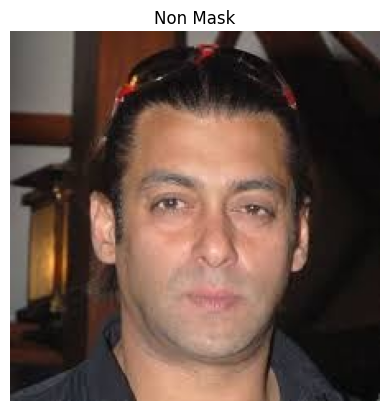

In [ ]:
img = view_image("/content/New Masks Dataset/Train/","Non Mask")


['0669.jpg']
image shape (683, 1024, 3)


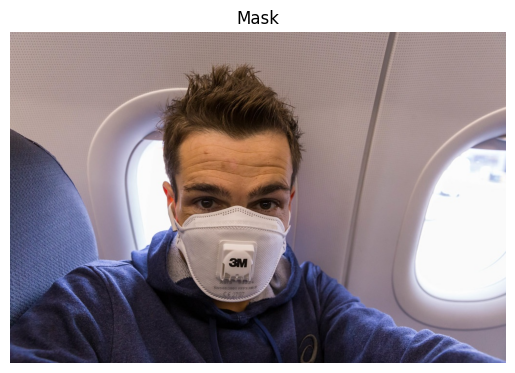

In [ ]:
img = view_image("/content/New Masks Dataset/Train/","Mask")

In [ ]:
data=[]
labels=[]
no_mask=os.listdir("/content/New Masks Dataset/Train/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

no_mask=os.listdir("/content/New Masks Dataset/Test/Non Mask/")
for a in no_mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Non Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(0)

In [ ]:
mask=os.listdir("/content/New Masks Dataset/Train/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Train/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)


mask=os.listdir("/content/New Masks Dataset/Test/Mask/")
for a in mask:

    image = cv2.imread("/content/New Masks Dataset/Test/Mask/"+a,)
    image = cv2.resize(image, (224, 224))


    data.append(image)
    labels.append(1)

In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
data.shape

(700, 224, 224, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42,shuffle=True,
                                                    stratify = labels)

In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

base_model.trainable = False

model = Flatten()(base_model.output)
model = Dense(units=256, activation="relu")(model)
model = Dense(units=64, activation="relu")(model)
prediction_layer = Dense(units=1, activation="sigmoid")(model)

model = Model(inputs = base_model.input, outputs = prediction_layer)
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
model.fit(X_train, y_train, epochs=15,validation_split= 0.1, batch_size=32)

Epoch 1/15
18/18 [==============================] - 29s 2s/step - loss: 0.7246 - accuracy: 0.8183 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 2/15
18/18 [==============================] - 29s 2s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0305 - val_accuracy: 0.9841
Epoch 3/15
18/18 [==============================] - 29s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0248 - val_accuracy: 0.9841
Epoch 4/15
18/18 [==============================] - 28s 2s/step - loss: 8.8485e-04 - accuracy: 1.0000 - val_loss: 0.0240 - val_accuracy: 0.9841
Epoch 5/15
18/18 [==============================] - 26s 1s/step - loss: 7.3593e-04 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9841
Epoch 6/15
18/18 [==============================] - 29s 2s/step - loss: 6.3847e-04 - accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 0.9841
Epoch 7/15
18/18 [==============================] - 26s 1s/step - loss: 5.6324e-04 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0.9841
Epoc

In [ ]:
predictions = model.predict(X_test)

predict=[]

for i in range(len(predictions)):
    if predictions[i][0]>0.5:
        predict.append(1)
    else:
        predict.append(0)

3/3 [==============================] - 3s 681ms/step


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict), columns= ["No Mask", "Mask"], index = ["No Mask", "Mask"])

,No Mask,Mask
No Mask,33,2
Mask,0,35


In [ ]:
model_name = "/content/mask_detection_best.h5"
tf.keras.models.save_model(model, model_name)

<ipython-input-27-0ca11de745e3>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, model_name)
